In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.1`("spotify2024.csv", encoding='latin1')

In [5]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [6]:
print(df.columns)

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')


In [7]:
sample_999 = df.iloc[998]

In [8]:
print(sample_999)

Track                          Miles On It
Album Name                     Miles on It
Artist                          Marshmello
Release Date                      5/3/2024
ISRC                          QZZVQ2400059
All Time Rank                          992
Track Score                           48.2
Spotify Streams                 41,924,126
Spotify Playlist Count               3,794
Spotify Playlist Reach         124,369,916
Spotify Popularity                    79.0
YouTube Views                    4,219,901
YouTube Likes                      103,922
TikTok Posts                           NaN
TikTok Likes                           NaN
TikTok Views                           NaN
YouTube Playlist Reach         237,146,592
Apple Music Playlist Count            87.0
AirPlay Spins                        4,032
SiriusXM Spins                          33
Deezer Playlist Count                 51.0
Deezer Playlist Reach            8,224,597
Amazon Playlist Count                 91.0
Pandora Str

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

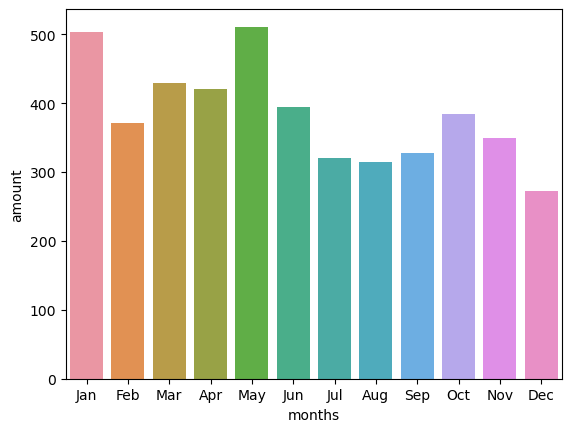

In [10]:
months = []
months = [0 for i in range(12)]

for date in df["Release Date"]:
    month = date.split('/')[0]
    months[int(month) - 1] += 1
        
graph = {
    "months" : ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "amount" : months
}

graphDF = pd.DataFrame(graph)
        
sns.barplot(x = "months",
            y = "amount",
            data = graphDF)

plt.show()

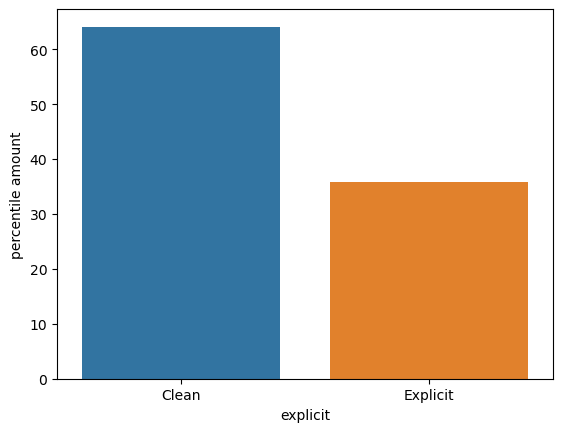

In [11]:
explicit = {"Clean" : 0, "Explicit" : 0}

for i in df["Explicit Track"]:
    if i == 0:
        explicit["Clean"] += (1 / len(df)) * 100
    elif i == 1:
        explicit["Explicit"] += (1 / len(df)) * 100
        
graph = {
    "explicit" : explicit.keys(),
    "percentile amount" : explicit.values()
}

graphDF = pd.DataFrame(graph)
        
sns.barplot(x = "explicit",
            y = "percentile amount",
            data = graphDF)

plt.show()

<AxesSubplot:xlabel='popularity', ylabel='Count'>

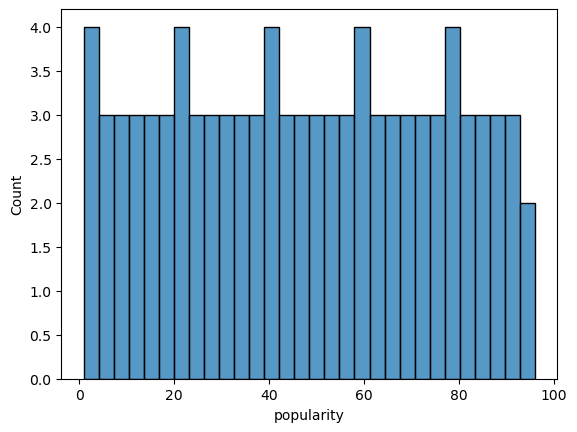

In [12]:
popularity = {}

for i in df["Spotify Popularity"]:
    if i in popularity:
        popularity[i] += 1
    else:
        popularity[i] = 1
        
graph = {
    "popularity" : popularity.keys(),
    "count" : popularity.values()
}

graphDF = pd.DataFrame(graph)

sns.histplot(data=graphDF, x="popularity", bins=30)

<AxesSubplot:xlabel='YouTube Views', ylabel='Count'>

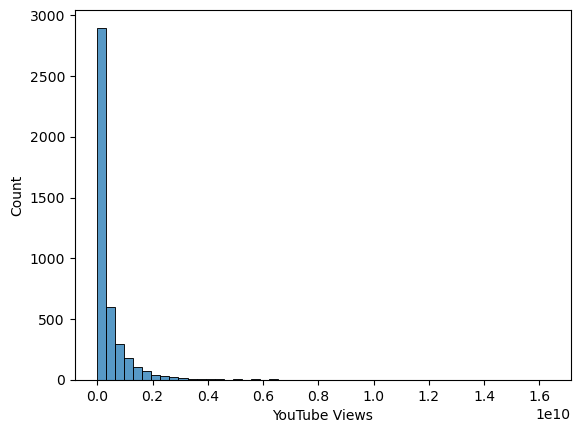

In [13]:
df = pd.read_csv("spotify2024.csv", encoding = "ISO-8859-1")
df["YouTube Views"] = df["YouTube Views"].str.replace(",", "")
df["YouTube Views"] = pd.to_numeric(df["YouTube Views"], errors="coerce")
sns.histplot(data=df, x="YouTube Views", bins=50)

<AxesSubplot:xlabel='Spotify Streams', ylabel='Count'>

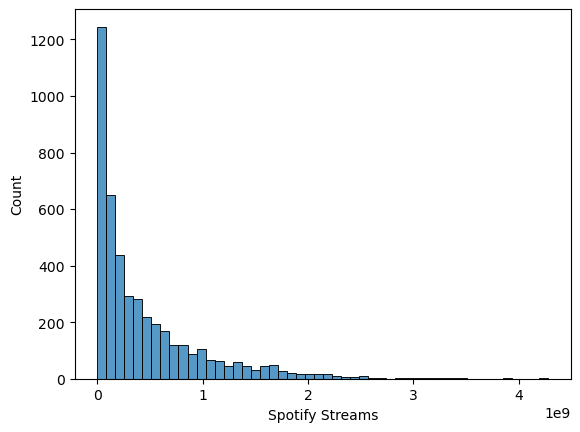

In [14]:
df = pd.read_csv("spotify2024.csv", encoding = "ISO-8859-1")
df["Spotify Streams"] = df["Spotify Streams"].str.replace(",", "")
df["Spotify Streams"] = pd.to_numeric(df["Spotify Streams"], errors="coerce")
sns.histplot(data=df, x="Spotify Streams", bins=50)